# Cost of Living

### Assignment Prompt

You are a data scientist and would like to know where the top 5 places in the world (country or city) where your salary will go the farthest with respect to each individual index within the cost_of_living.csv file. Provide a simple statistical analysis in a Jupyter Notebook file and provide visualizations to support your analysis (I am looking for data wrangling more than anything). 

In [105]:
import sys

In [106]:
# Importing Key Packages

import pandas as pd

import datetime
from datetime import timedelta

import matplotlib.pylab as plt # Simple plotting functions
import seaborn as sns          # Advanced plotting functions

## Merging Cost of Living with Country Code

In [124]:
col = pd.read_csv('cost_of_living.csv')


col.head()

,Rank,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,NaN,"Aachen, Germany",61.81,21.74,43.03,49.49,57.99,116.48
1,NaN,"Aalborg, Denmark",82.43,23.26,54.70,71.24,93.27,100.93
2,NaN,"Aberdeen, United Kingdom",63.40,23.06,44.49,47.87,77.47,102.02
3,NaN,"Abidjan, Ivory Coast",47.06,19.73,34.25,40.32,32.22,6.27
4,NaN,"Abu Dhabi, United Arab Emirates",57.89,91.80,73.79,49.79,58.49,75.22


In [126]:
CCodes = pd.read_csv('country_codes.csv', encoding='latin1')
CCodes.head()

,Country,Alpha-2 code,Alpha-3 code,Numeric
0,Afghanistan,AF,AFG,4
1,Albania,AL,ALB,8
2,Algeria,DZ,DZA,12
3,American Samoa,AS,ASM,16
4,Andorra,AD,AND,20


In [131]:
# Separating the Country from the City
col[['City', 'Country']] = col['City'].str.rsplit(', ', 1, expand=True)
col[['City', 'Country']].head()

C:\Users\camga\AppData\Local\Temp\ipykernel_8580\3150625341.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  col[['City', 'Country']] = col['City'].str.rsplit(', ', 1, expand=True)


,City,Country
0,Aachen,Germany
1,Aalborg,Denmark
2,Aberdeen,United Kingdom
3,Abidjan,Ivory Coast
4,Abu Dhabi,United Arab Emirates


In [132]:
col.to_csv('col3.csv')

In [133]:
col.head()

,Rank,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Country
0,NaN,Aachen,61.81,21.74,43.03,49.49,57.99,116.48,Germany
1,NaN,Aalborg,82.43,23.26,54.70,71.24,93.27,100.93,Denmark
2,NaN,Aberdeen,63.40,23.06,44.49,47.87,77.47,102.02,United Kingdom
3,NaN,Abidjan,47.06,19.73,34.25,40.32,32.22,6.27,Ivory Coast
4,NaN,Abu Dhabi,57.89,91.80,73.79,49.79,58.49,75.22,United Arab Emirates


In [151]:
# Isolating Paratheses Rows to Split

cc2 = CCodes[CCodes.Country.str.endswith(')')] # Countries with Parentheses
cc3 = CCodes[~CCodes.Country.str.endswith(')')] # Regular Countries
cc2.head()

,Country,Alpha-2 code,Alpha-3 code,Numeric
15,Bahamas (the),BS,BHS,44
25,Bolivia (Plurinational State of),BO,BOL,68
31,British Indian Ocean Territory (the),IO,IOT,86
40,Cayman Islands (the),KY,CYM,136
41,Central African Republic (the),CF,CAF,140


In [152]:
# Splitting Out Country from Parentheses in the new DF

cc2[['Country', 'Par']] = cc2['Country'].str.split('(',1, expand=True) # Splitting Out Parentheses
cc2['Country'] = cc2['Country'][:-1]
# cc2['Country'] = cc2['Country'].str.rstrip()

cc2.head()

C:\Users\camga\AppData\Local\Temp\ipykernel_8580\3268366.py:3: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  cc2[['Country', 'Par']] = cc2['Country'].str.split('(',1, expand=True) # Splitting Out Parentheses
C:\Users\camga\AppData\Local\Temp\ipykernel_8580\3268366.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc2[['Country', 'Par']] = cc2['Country'].str.split('(',1, expand=True) # Splitting Out Parentheses
C:\Users\camga\AppData\Local\Temp\ipykernel_8580\3268366.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,Country,Alpha-2 code,Alpha-3 code,Numeric,Par
15,Bahamas,BS,BHS,44,the)
25,Bolivia,BO,BOL,68,Plurinational State of)
31,British Indian Ocean Territory,IO,IOT,86,the)
40,Cayman Islands,KY,CYM,136,the)
41,Central African Republic,CF,CAF,140,the)


In [153]:
# Drop the Par Column
cc2 = cc2.drop(columns=['Par']) # Dropping Par
cc2.tail()

,Country,Alpha-2 code,Alpha-3 code,Numeric
228,Turks and Caicos Islands,TC,TCA,796
234,United States Minor Outlying Islands,UM,UMI,581
239,Venezuela,VE,VEN,862
241,Virgin Islands,VG,VGB,92
242,NaN,VI,VIR,850


In [154]:
# Exporting to Excel to Check

cc2.to_csv('cc2.csv')

In [155]:
country_codes = pd.concat([cc2, cc3], ignore_index = True)

country_codes = country_codes.sort_values(['Country'], ignore_index = True)
country_codes.head()

country_codes.head()

,Country,Alpha-2 code,Alpha-3 code,Numeric
0,Afghanistan,AF,AFG,4
1,Aland Islands,AX,ALA,248
2,Albania,AL,ALB,8
3,Algeria,DZ,DZA,12
4,American Samoa,AS,ASM,16


In [157]:
# Merging Cost of Living DF w/ Country Codes

main_df = pd.merge(col, country_codes, how = 'left', on = ['Country'])
main_df = main_df.drop(columns=['Rank'])

main_df.head()

,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Country,Alpha-2 code,Alpha-3 code,Numeric
0,Aachen,61.81,21.74,43.03,49.49,57.99,116.48,Germany,DE,DEU,276.0
1,Aalborg,82.43,23.26,54.70,71.24,93.27,100.93,Denmark,DK,DNK,208.0
2,Aberdeen,63.40,23.06,44.49,47.87,77.47,102.02,United Kingdom,GB,GBR,826.0
3,Abidjan,47.06,19.73,34.25,40.32,32.22,6.27,Ivory Coast,NaN,NaN,NaN
4,Abu Dhabi,57.89,91.80,73.79,49.79,58.49,75.22,United Arab Emirates,AE,ARE,784.0


In [158]:
# Exporting to Excel to Check

main_df.to_csv('main_df.csv')

## Salary Analysis 

In [175]:
sal = pd.read_csv('ds_salaries.csv')
sal.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [176]:
lvls = pd.read_csv('Levels_Fyi_Salary_Data.csv')
lvls.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [177]:
# What job families exist in this data frame?

lvls.title.unique()

array(['Product Manager', 'Software Engineer',
       'Software Engineering Manager', 'Data Scientist',
       'Solution Architect', 'Technical Program Manager',
       'Human Resources', 'Product Designer', 'Marketing',
       'Business Analyst', 'Hardware Engineer', 'Sales', 'Recruiter',
       'Mechanical Engineer', 'Management Consultant'], dtype=object)

In [178]:
#only going to look at DS, BA, Data Analyst roles (near entry level)

sal_df = lvls[lvls['title'].isin(['Data Scientist','Business Analyst'])]

# Rename Yearly Comp Column for easier calling later
sal_df.rename(columns = {'totalyearlycompensation':'total_comp'}, inplace = True)

#average Salary for these job titles
sal_df.total_comp.describe()

C:\Users\camga\AppData\Local\Temp\ipykernel_8580\3832609137.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_df.rename(columns = {'totalyearlycompensation':'total_comp'}, inplace = True)


count       3463.000000
mean      184763.499856
std       105458.802449
min        10000.000000
25%       115000.000000
50%       165000.000000
75%       230000.000000
max      1000000.000000
Name: total_comp, dtype: float64

In [179]:
# What percentage of my rows are NULL?
pd.set_option('display.max_rows', 500)

# Check NULL in Each column as a %
print('Null Percentages by Column')
sal_df.isnull().sum(axis=0)/len(sal_df)*100

# Clearly we're missing a ton of gender and background details

Null Percentages by Column


timestamp             0.000000
company               0.000000
level                 0.433150
title                 0.000000
total_comp            0.000000
location              0.000000
yearsofexperience     0.000000
yearsatcompany        0.000000
tag                   0.231014
basesalary            0.000000
stockgrantvalue       0.000000
bonus                 0.000000
gender               34.536529
otherdetails         27.606122
cityid                0.000000
dmaid                 0.000000
rowNumber             0.000000
Masters_Degree        0.000000
Bachelors_Degree      0.000000
Doctorate_Degree      0.000000
Highschool            0.000000
Some_College          0.000000
Race_Asian            0.000000
Race_White            0.000000
Race_Two_Or_More      0.000000
Race_Black            0.000000
Race_Hispanic         0.000000
Race                 60.872076
Education            44.239099
dtype: float64

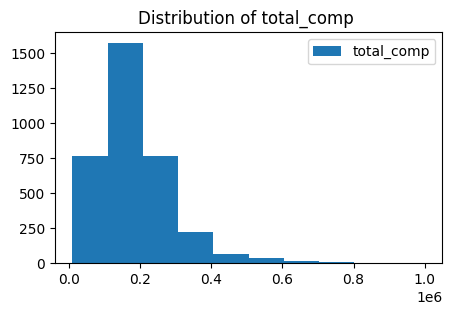

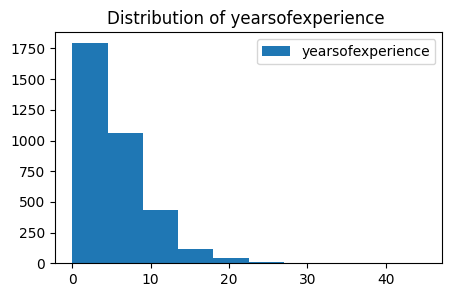

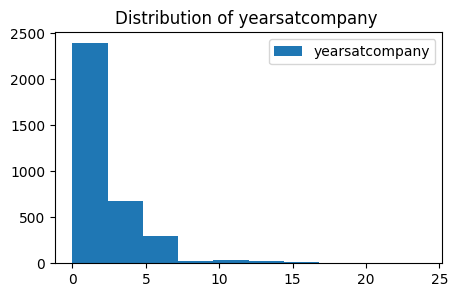

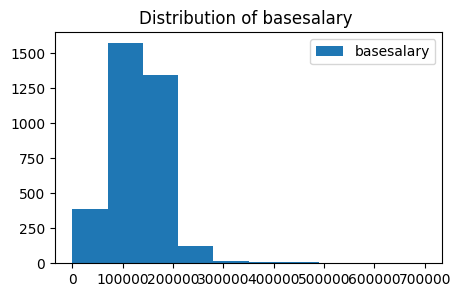

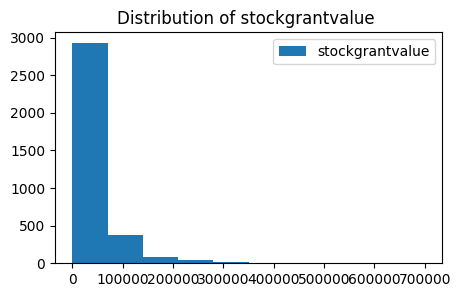

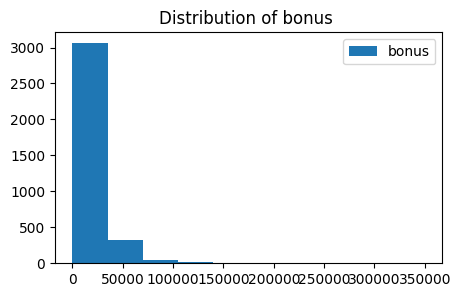

In [180]:
# Looking for Outliers in Histogramming

for c in ['total_comp','yearsofexperience','yearsatcompany','basesalary','stockgrantvalue','bonus']:
    
    fig = plt.figure(figsize=(5,3))
    plt.hist(sal_df[c], label=c)
    plt.title(f"Distribution of {c} ")
    plt.legend()
    plt.show()

In [181]:
# Delete outliers

max_comp = 850000
max_years_company = 10
max_base = 500000
max_stock = 400000
max_bonus = 150000

df_clean = sal_df

df_clean = df_clean[df_clean['total_comp'] <= max_comp]
df_clean = df_clean[df_clean['yearsatcompany'] <= max_years_company]
df_clean = df_clean[df_clean['basesalary'] <= max_base]
df_clean = df_clean[df_clean['stockgrantvalue'] <= max_stock]
df_clean = df_clean[df_clean['bonus'] <= max_bonus]

df_clean = df_clean.drop_duplicates()

# How much did we cut?
print(round((len(sal_df)-len(df_clean))/len(sal_df)*100,2), '% removed during cleaning')

2.31 % removed during cleaning


In [183]:
# Setting Cleaned DF as the main Salary DF

sal_df = df_clean
sal_df.head()

,timestamp,company,level,title,total_comp,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
419,6/5/2018 14:06:30,LinkedIn,Senior,Data Scientist,233000,"San Francisco, CA",4.0,0.0,Data Analysis,162000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
444,6/8/2018 17:55:09,ebay,26,Data Scientist,180000,"San Jose, CA",10.0,5.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
454,6/10/2018 19:39:35,Twitter,Staff,Data Scientist,500000,"San Francisco, CA",4.0,4.0,ML / AI,200000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
495,6/17/2018 11:39:38,Facebook,5,Data Scientist,370000,"Seattle, WA",8.0,3.0,NaN,190000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
499,6/17/2018 19:02:50,Amazon,L5,Data Scientist,200000,"Seattle, WA",3.0,0.0,ML / AI,150000.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [185]:
#average Salary per position
agg_df = sal_df[['title','yearsofexperience','total_comp']].groupby(['title','yearsofexperience']).mean().reset_index()

agg_df.head()

,title,yearsofexperience,total_comp
0,Business Analyst,0.0,85140.625000
1,Business Analyst,1.0,82303.370787
2,Business Analyst,2.0,100689.655172
3,Business Analyst,3.0,105389.473684
4,Business Analyst,4.0,122195.402299


In [194]:
# Only looking for BAs and DS positions with 3 years of experience or less because I'm entry level
agg_df = agg_df[agg_df['yearsofexperience'] <= 3]

#Final Average
agg_final = agg_df.total_comp.mean()
print('Mean Salary for American DS or BA Entry-Level Role = $',round(agg_final))

Mean Salary for American DS or BA Entry-Level Role = $ 127729


## Comparing Salary Across Different Nations

In [237]:
# Reimporting the DF with the Cost of Living Indexes

col = pd.read_csv('main_df.csv')

# Reorganize
col = col[['City', 'Country', 'Alpha-2 code', 'Alpha-3 code', 
           'Cost of Living Index', 'Rent Index', 'Cost of Living Plus Rent Index', 
           'Groceries Index', 'Restaurant Price Index', 'Local Purchasing Power Index']]

# Drop NULL Values
col = col.dropna()

# Sorting the DF
col = col.sort_values(['Country'], ignore_index = True)
col.head()

,City,Country,Alpha-2 code,Alpha-3 code,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,Kabul,Afghanistan,AF,AFG,21.35,3.17,12.83,15.22,14.85,22.79
1,Tirana,Albania,AL,ALB,38.68,11.33,25.86,30.99,29.86,31.15
2,Algiers,Algeria,DZ,DZA,29.84,6.67,18.98,30.25,20.79,21.78
3,Buenos Aires,Argentina,AR,ARG,35.25,10.73,23.75,28.54,34.35,26.89
4,Yerevan,Armenia,AM,ARM,34.01,11.89,23.64,27.81,31.01,29.73


In [238]:
# We know our Salary is about $130,000 USD, so we need to figure out what that looks like per city

# Adding Salary Column
col['usd_salary'] = round(agg_final,2)

# Creating Adjusted Salary based on Purchasing Power Locally
col['adjusted_salary'] = round(col['usd_salary'] * (col['Local Purchasing Power Index'] / 100),2)

In [239]:
# Determining which cities money goes furthest
col['affordability_rank'] = col['adjusted_salary'].rank()

# Sorting DF to reveal top 5 cities my money goes further
col = col.sort_values(['affordability_rank'], ignore_index = True)
col.tail()

,City,Country,Alpha-2 code,Alpha-3 code,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,usd_salary,adjusted_salary,affordability_rank
536,"San Jose, CA",United States,US,USA,73.71,82.30,77.74,70.53,74.25,157.39,127729.11,201032.85,537.0
537,"Austin, TX",United States,US,USA,66.50,57.68,62.36,67.33,73.74,158.21,127729.11,202080.22,538.0
538,"Ann Arbor, MI",United States,US,USA,70.28,47.97,59.82,74.16,63.62,159.99,127729.11,204353.80,539.0
539,"Dallas, TX",United States,US,USA,67.85,50.17,59.56,63.61,71.74,170.66,127729.11,217982.50,540.0
540,"Houston, TX",United States,US,USA,63.94,43.38,54.30,61.26,67.45,172.98,127729.11,220945.81,541.0


In [240]:
#Positive/Negative Field to Show which places my Money is worth more than standard (NYC) or less

col['value_category'] = 'low'
col.loc[col['Local Purchasing Power Index'] >= 100, 'value_category'] = 'high'

col.head()

,City,Country,Alpha-2 code,Alpha-3 code,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,usd_salary,adjusted_salary,affordability_rank,value_category
0,Havana,Cuba,CU,CUB,55.91,17.20,37.77,45.92,40.14,1.62,127729.11,2069.21,1.0,low
1,Lagos,Nigeria,NG,NGA,37.33,61.89,48.84,39.28,29.59,8.30,127729.11,10601.52,2.0,low
2,Kampala,Uganda,UG,UGA,35.98,11.50,24.50,32.50,26.61,9.83,127729.11,12555.77,3.5,low
3,Addis Ababa,Ethiopia,ET,ETH,50.49,17.44,35.00,36.77,21.45,9.83,127729.11,12555.77,3.5,low
4,Yogyakarta,Indonesia,ID,IDN,30.80,9.77,20.94,36.08,13.91,12.16,127729.11,15531.86,5.0,low


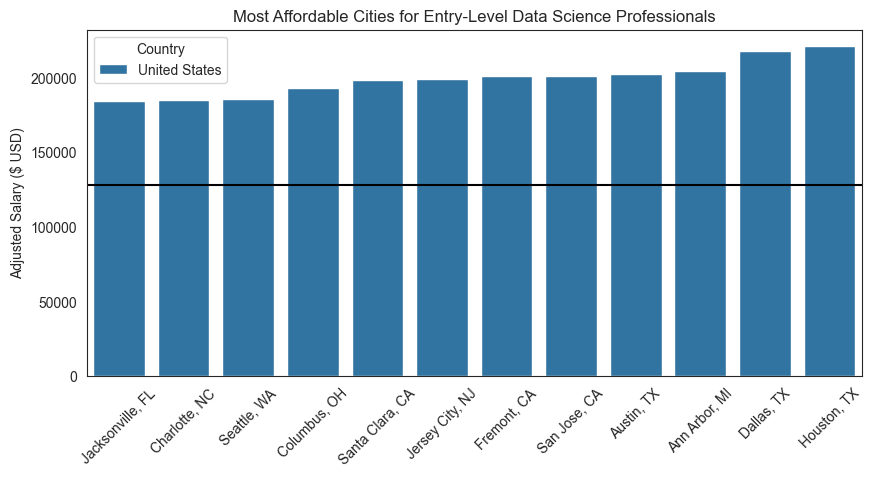

In [241]:
# Showing Top 16 Cities in a Bar Chart
top_10 = col[col['affordability_rank'] >= 530]

# How Different are the Top 10?

plt.figure(figsize = (10,4.5))

sns.set_style('white')

sns.barplot(data=top_10, x="City", y="adjusted_salary",hue='Country')

plt.title('Most Affordable Cities for Entry-Level Data Science Professionals')
plt.ylabel('Adjusted Salary ($ USD)')
plt.xlabel('') # Left City Blank

plt.xticks(rotation=45) # Rotating the Tick Marks by 45 degress to help them fit
plt.axhline(127730, label = 'Unadjusted Salary in NYC', color = 'black') # Showing the Baseline (NYC, USA)

<AxesSubplot: xlabel='affordability_rank', ylabel='adjusted_salary'>

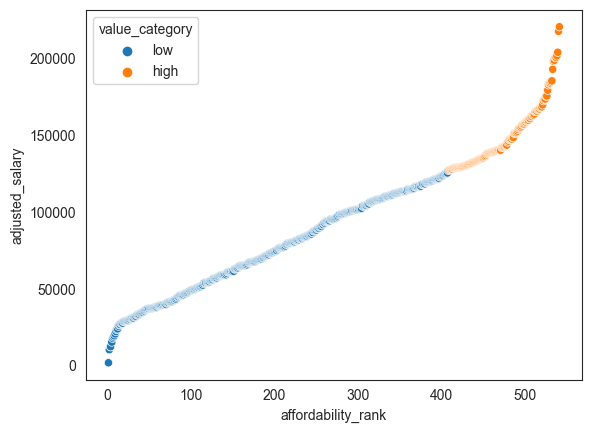

In [242]:
# Creating a Scatter Plot to Understand How Far my Money can go globally

sns.scatterplot(data=col, x="affordability_rank", y="adjusted_salary", hue="value_category")